In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [2]:
!pip install -q kaggle

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:04<00:00, 250MB/s]
100% 1.06G/1.06G [00:04<00:00, 235MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.applications.vgg16 import VGG16

In [6]:
conv_base = VGG16(
    weights = 'imagenet',
    include_top=False,
    input_shape=(130,130,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Generators for Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    directory = '/content/train',
    target_size=(130,130),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    directory = '/content/test',
    target_size=(130,130),
    batch_size=32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [24]:
# # Normalize
# def process(image,label):
#   image=tensorflow.cast(image/255. , tensorflow.float64)
#   return image,label

# train_generator = train_datagen.map(process)
# test_generator = test_datagen.map(process)

In [25]:
conv_base.trainable = False

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(train_generator, epochs=10, validation_data = test_generator)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 202ms/step - accuracy: 0.9025 - loss: 0.2303 - val_accuracy: 0.9096 - val_loss: 0.2109
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 126s 201ms/step - accuracy: 0.9027 - loss: 0.2272 - val_accuracy: 0.9048 - val_loss: 0.2269
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 200ms/step - accuracy: 0.9161 - loss: 0.2001 - val_accuracy: 0.9062 - val_loss: 0.2259
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 124s 198ms/step - accuracy: 0.9152 - loss: 0.2012 - val_accuracy: 0.9100 - val_loss: 0.2109
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 199ms/step - accuracy: 0.9216 - loss: 0.1846 - val_accuracy: 0.9154 - val_loss: 0.2039
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 124s 199ms/step - accuracy: 0.9251 - loss: 0.1826 - val_accuracy: 0.9122 - val_loss: 0.2086
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 199ms/step - accuracy: 0.9302 - loss: 0.1735 - val_accuracy: 0.9098 - val_loss: 0.2128
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 199ms/step - accuracy: 0.9333 -

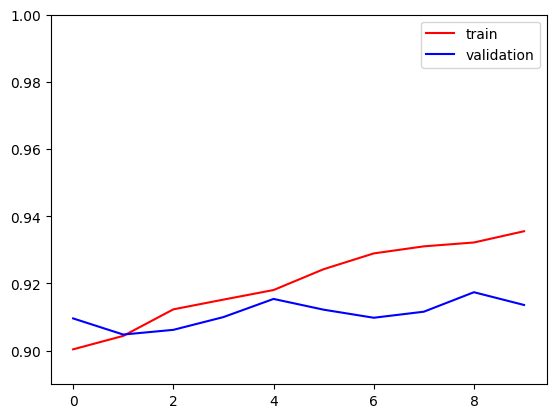

In [43]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.ylim(0.89,1)
plt.legend()
plt.show()

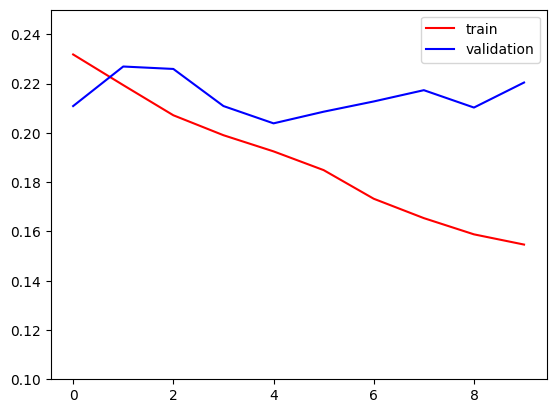

In [46]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.ylim(0.1,0.25)
plt.legend()
plt.show()